Build the Linear regression model for:
   a) Wine quality
   b) Select your own data

For both datasets:
1) Calculate all the coeficients

2) Calculate p-values. 
   .If any p-value is > 0.05, this means
     we are not sure if the coeficient is significant
     (close to zero - does not have an impact on the target variable).
     In this case - remove the factor from the Linear regression equation
     and recalculate the results again. Check p-values, repeat the procedure 
     if needed.

3) Calculate rest of desriptive measures of the model
   (MSE, R-squared, etc.).
   Based on them, provide the feeback on how good the 
   model fits the data. Calculate the predictions
   for some predictior values selected (up to you
   to select), provide the feedback.
   
   Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)
4) If in point b) you selected 1 factor regression,
   then display the model (regression line
   in plot)

In [35]:
# Importing libraries for Data manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =  14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [7]:
# downloading white wine dataset

df = pd.read_csv('c://Users/Kristine/Desktop/SGT_Python2/Materials/winequality-red.csv', sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The target variable in this dataset is 'QUALITY' and all other columns, except index, are independent variables. 

As there are multipile independent variables, Multiple linear regression will be applied

Text(0.5, 1.0, 'Fixed Acidity VS Quality')

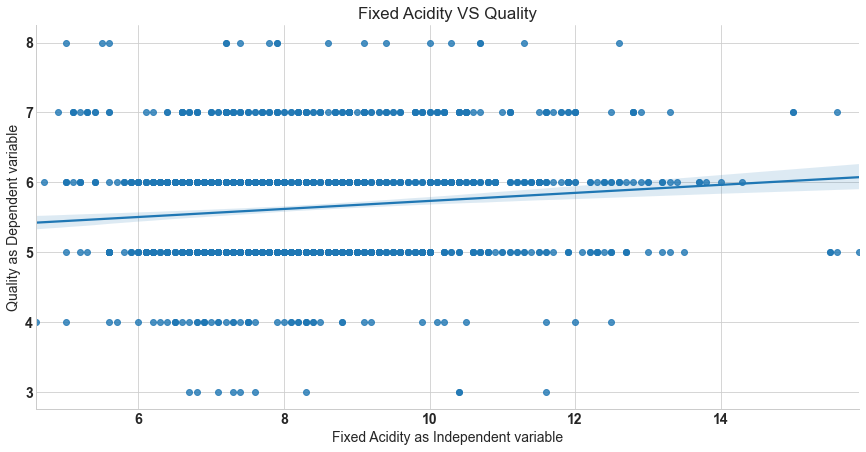

In [13]:
#For first visualization purpose will fit line using seaborn library only for:
#'volatile acidity' as independent variable and 'quality' as dependent variable

sns.lmplot(x='fixed acidity', y='quality', data=df, aspect=2, height=6)
plt.xlabel('Fixed Acidity as Independent variable')
plt.ylabel('Quality as Dependent variable')
plt.title('Fixed Acidity VS Quality')

Fitted regression line into variables

Quality is evaluated as a whole number, that's the reason why all scatters are in lines.

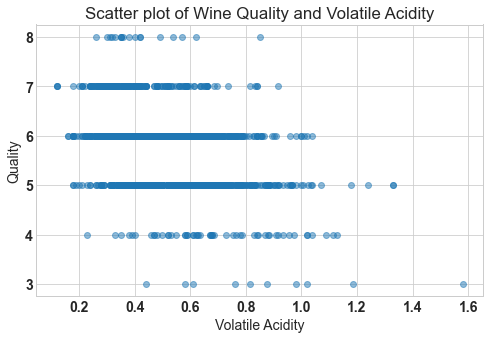

In [36]:
plt.scatter(df['volatile acidity'], df['quality'], alpha=0.5)
plt.title('Scatter plot of Wine Quality and Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

Text(0.5, 1.0, 'Missing value')

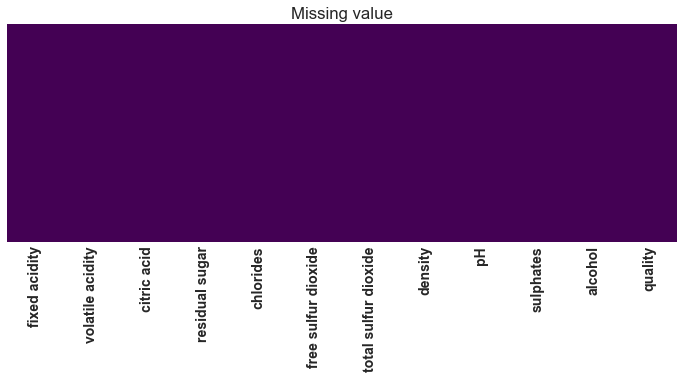

In [15]:
#check fo missing value 

plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value')

There is no missing data in the dataset

In [ ]:
#Multicollinearity occurs when the independent variables are correlated to each other. 
#If the degree of multicollinearity is high it can cause problems while interpreting the results.

<AxesSubplot:>

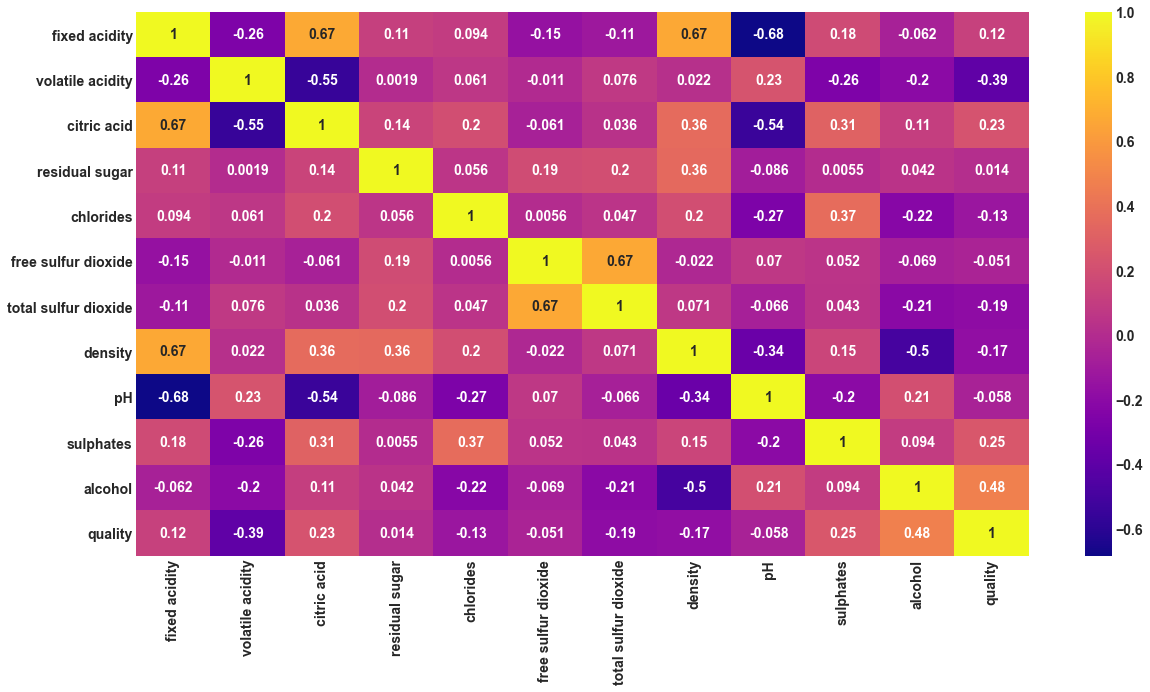

In [18]:
# correlation plot
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, cmap='plasma', annot=True)

In [ ]:
# Correlations ranges from -1 to 1. Values close to 0 means - there is no linear trend between variables. The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relantionsip is.
#A correlation closer to -1 is similar, but instead of increasing one variable will decrease as the other increases.    

Heat map shows, that there is some correlation betwen pH & fixed acidity, pH & citric acid, citric acid & volatile acidity, slight correlation between alcohol & density.

In [50]:
#We can find the degree of correlation with the help of Variation Inflation Factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['fixed acidity','volatile acidity','citric acid', 
                                                   'pH', 'alcohol']].values, i) for i in range(x.shape[1])]
vif["features"] = df[['fixed acidity','volatile acidity','citric acid', 'pH', 'alcohol']].columns
vif.round(1)

,VIF Factor,features
0,38.2,fixed acidity
1,14.6,volatile acidity
2,7.6,citric acid
3,138.6,pH
4,110.8,alcohol


In [54]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['residual sugar','free sulfur dioxide',
                                                   'density', 'chlorides', 'sulphates']].values, i) for i in range(x.shape[1])]
vif["features"] = df[['residual sugar','free sulfur dioxide','density', 'chlorides', 'sulphates']].columns
vif.round(1)

,VIF Factor,features
0,4.4,residual sugar
1,3.4,free sulfur dioxide
2,20.5,density
3,5.2,chlorides
4,18.7,sulphates


It can be interpreted as :

1= Not correlated

1–5 = Moderately correlated

More than 5 = Highly correlated

In [60]:
VIF = 1/(1- R_square_sk)
VIF

1.6892488295940415

Common variance inflation factor value is less than 5, so no multicollearity

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


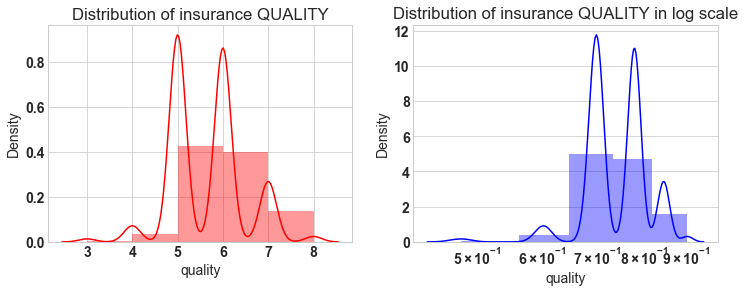

In [21]:
f = plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['quality'], bins=5, color='r', ax=ax)
ax.set_title('Distribution of insurance QUALITY')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['quality']), bins=5, color='b', ax=ax)
ax.set_title('Distribution of insurance QUALITY in log scale')
ax.set_xscale('log')

In [ ]:
#The left plot shows that wine quality varies from 1 to 9, the plot is right skewed. 
# In the right plot, natural log is applied with purpose to make data more symmetric.
# In case of performing statistic analysis that assumes normality, a log transformation might help us meet this assumption

Text(0.5, 1.0, 'Scatter plot of Scatter vs Alcohol')

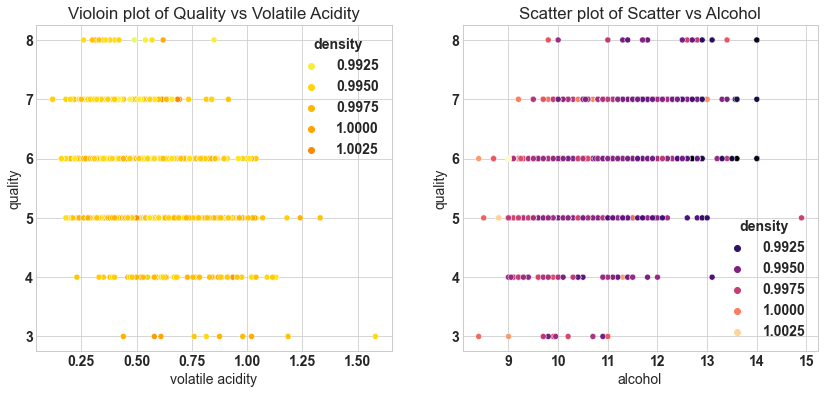

In [26]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='volatile acidity', y="quality", data=df, palette='Wistia', hue='density', ax=ax)
ax.set_title('Violoin plot of Quality vs Volatile Acidity')

ax = f.add_subplot(122)
sns.scatterplot(x='alcohol', y='quality', data=df, palette='magma', hue='density', ax=ax)
ax.set_title('Scatter plot of Scatter vs Alcohol')

Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis = 1) # Independent variable
y = df['quality'] #Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

Model building

In [28]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [29]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [30]:
# Scikit Learn model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,4.718325,4.718325
1,theta_1,fixed acidity,0.003299,0.003299
2,theta_2,volatile acidity,-1.116009,-1.116009
3,theta_3,citric acid,-0.163674,-0.163674
4,theta_4,residual sugar,0.017637,0.017637
5,theta_5,chlorides,-1.731061,-1.731061
6,theta_6,free sulfur dioxide,0.004267,0.004267
7,theta_7,total sulfur dioxide,-0.003286,-0.003286
8,theta_8,density,-0.104331,-0.104331
9,theta_9,pH,-0.503768,-0.503768


The parameters obtained in both models are the same. It means that the model is successfully build by applying normal equation 

and verified using sklearn regression module.

In [33]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.3536432777631093
R square obtain for normal equation method is : 0.40802090107730826


In [34]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.3536432777633595
R square obtain for scikit learn library is : 0.4080209010768894


In [ ]:
#The smaller MSE, the closer you are to find the line of best fit.
#R_square is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 
#100% indicated that model explains all the variablity of the response data around the mean.
#41% indicates that mode explains some of the variability of the response data around it's mean.

Model Validation

#Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. 
#This can be checked by scatter ploting Actual value Vs Predicted value
#The residual error plot should be normally distributed.
#The mean of residual error should be 0 or close to 0 as much as possible

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

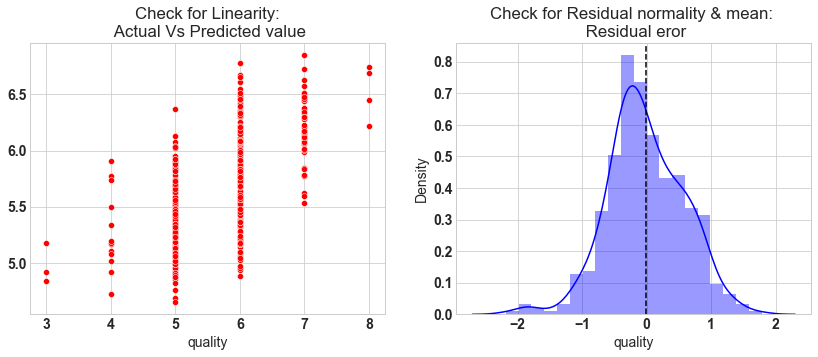

In [57]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

The residual mean is zero and residual error plot right skewed

In [ ]:
#The linear regression require all variables to be multivariate normal. 
#Skewness can be due to the presence of outliers and this can make bias while parameter estimation.
#The most powerful way of doing this by a Q-Q probability plot. The Quantile-Quantile is made by plotting the residuals vs the order of statistic.
#Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

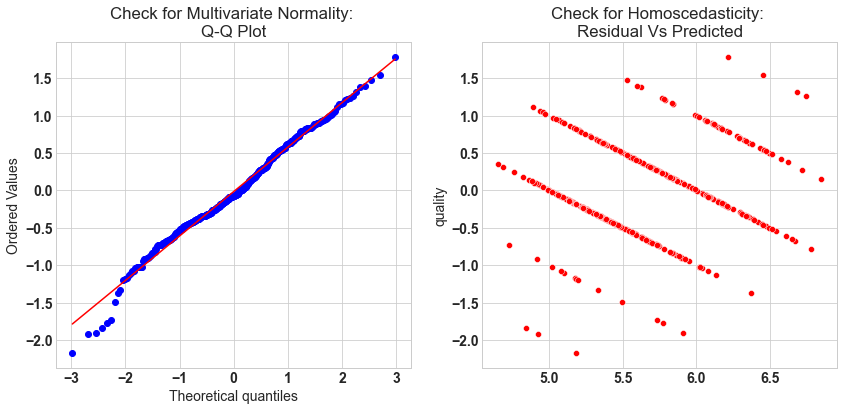

In [58]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

Q-Q plot shows as value log value is less than -2.1 trends decrease

White test

In [62]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

x=df[['fixed acidity','residual sugar','alcohol', 'density']].values    #independent varaibles 
y=df['quality'].values      #dependent variable

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [63]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

In [64]:
#define labels to use for output of White's test
labels = ['Lagrange multiplier Statistic', 'Test Statistic p-value', 'F-Statistic f-value', 'F-Test p-value']

#print results of White's test
lzip(labels, white_test)

[('Lagrange multiplier Statistic', 117.09205032351642),
 ('Test Statistic p-value', 2.330711946664665e-18),
 ('F-Statistic f-value', 8.939913660096146),
 ('F-Test p-value', 4.168066828691815e-19)]

The test statistic is X2 = 117.092.
The corresponding p-value is 2.3307.

White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered)

Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [66]:
X = sm.add_constant(X)

model = sm.OLS(y,X)

results = model.fit()

In [67]:
results.pvalues

const                   3.001921e-01
fixed acidity           3.356528e-01
volatile acidity        9.872361e-19
citric acid             2.149942e-01
residual sugar          2.764960e-01
chlorides               8.373953e-06
free sulfur dioxide     4.474495e-02
total sulfur dioxide    8.004610e-06
density                 4.086079e-01
pH                      3.100189e-02
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        00:05:28   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""